#### 2023-2 DSL 정규세션 과제
##### Unsupervised Learning
 - 작성자 : 장현빈
 - 과제 제출 기한 : 2023.08.05. (토) 23:59
 ---


- 이름 : 임선민
- 기수 : 9기

1. 세션에서 다룬 Feature Extraction 알고리즘을 적용하여 차원 축소 결과를 확인해봅시다.
2. 데이터에 대해, PCA 수행 결과를 여러 클러스터링 알고리즘을 가지고 수행한 뒤 평가해봅시다.
3. KPCA, t-SNE, UMAP을 가지고 k-means 클러스터링까지 완료하여 성능을 평가해봅시다.

**문제는 총 Q-1(1-3), Q-2(1-6), Q-3(1-3)과 코드 실행을 위한 빈칸으로 이루어져 있습니다!

**과제 제출 시 파일명을 과제 파일명의 'yourname' 부분만 본인의 이름(영어)로 바꾸어 제출 부탁드립니다!

#0. 기본 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from time import time
import warnings
warnings.filterwarnings('ignore')

#1. 데이터별로 다양한 차원축소 알고리즘을 수행해보기

In [2]:
import mpl_toolkits.mplot3d
import numpy as np
from matplotlib.ticker import NullFormatter

from sklearn import manifold
from sklearn.utils import check_random_state
from sklearn import manifold, decomposition
from matplotlib import ticker
from sklearn import datasets, manifold

##1) Sphere Data Example

In [3]:
#차원 축소 학습을 진행하기 위한 변수를 설정해줍니다.
n_neighbors = 10
n_samples = 1000

In [4]:
#원본이 되는 기하학적인 구형 데이터를 만들어줍니다.
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

indices = (t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8)))
colors = p[indices]
x, y, z = (
    np.sin(t[indices]) * np.cos(p[indices]),
    np.sin(t[indices]) * np.sin(p[indices]),
    np.cos(t[indices]),
)

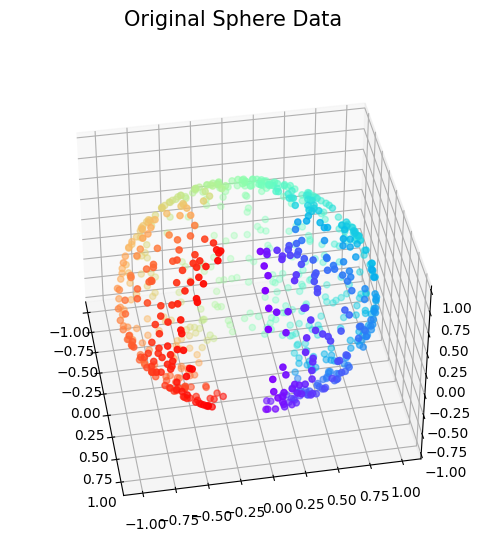

In [5]:
#3차원 원본 데이터를 확인해봅시다!
fig = plt.figure(figsize=(6, 6))
plt.suptitle(
    "Original Sphere Data", fontsize=15
)

ax = fig.add_subplot(projection="3d")
ax.scatter(x, y, z, c=colors, cmap=plt.cm.rainbow)
ax.view_init(40, -10)

sphere_data = np.array([x, y, z]).T
plt.show()

In [6]:
#여러 가지 차원 축소 알고리즘을 사용해봅시다.
feature_extraction = ["PCA", "MDS", "KPCA", "Isomap", "LLE", "t-SNE"]

PCA: 0.029 sec
MDS: 3.5 sec
KPCA: 4.3e-06 sec
Isomap: 1.2 sec
LLE: 0.41 sec
t-SNE: 22 sec


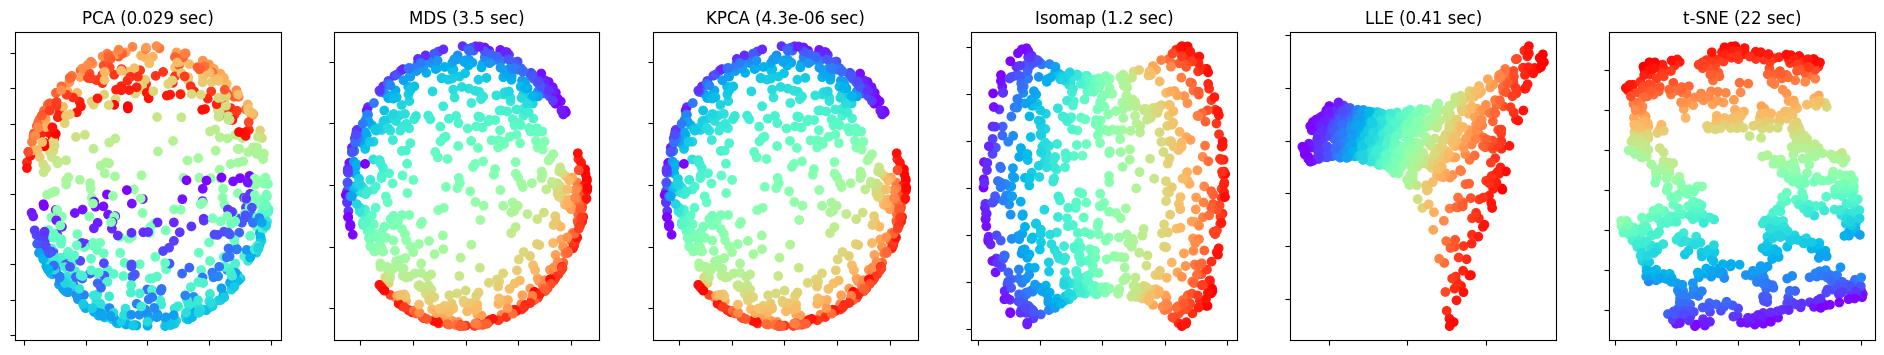

In [7]:
plots = []
fig, axes = plt.subplots(nrows=1, ncols=len(feature_extraction), figsize=(24, 4))

#세션에서 다룬 Unsupervised feature extraction 알고리즘들을 적용해봅시다!
for i, algorithm in enumerate(feature_extraction, start=1):
    t0 = time()

    if algorithm == "PCA":
        pca = decomposition.PCA(n_components=2)
        trans_data = pca.fit_transform(sphere_data).T

    elif algorithm == "MDS":
        mds = manifold.MDS(n_components=2, max_iter=100, n_init=1, random_state=0)
        trans_data = mds.fit_transform(sphere_data).T

    elif algorithm == "KernelPCA":
        kernel_pca = decomposition.KernelPCA(n_components=2, kernel='rbf')
        trans_data = kernel_pca.fit_transform(sphere_data).T

    elif algorithm == "Isomap":
        trans_data = manifold.Isomap(n_neighbors=n_neighbors, n_components=2).fit_transform(sphere_data).T

    elif algorithm == "LLE":
        trans_data = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2).fit_transform(sphere_data).T

    elif algorithm == "t-SNE":
        tsne = manifold.TSNE(n_components=2, random_state=0)
        trans_data = tsne.fit_transform(sphere_data).T

    t1 = time()
    print("%s: %.2g sec" % (algorithm, t1 - t0))

    ax = axes[i - 1]
    ax.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
    ax.set_title("%s (%.2g sec)" % (algorithm, t1 - t0))
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.axis("tight")

plt.show()

##2) S-curve Data Example

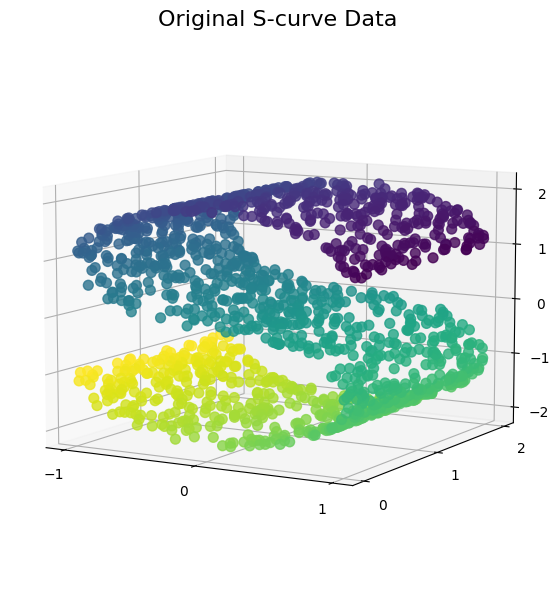

In [8]:
#sample의 수를 지정해줍니다.
n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=0)

#원본이 되는 기하학적 구조의 S-curve Data를 만들어봅시다.
def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

plot_3d(S_points, S_color, "Original S-curve Data")

In [9]:
#여러 가지 차원 축소 알고리즘을 사용해봅시다.
feature_extraction = ["PCA", "MDS", "KPCA", "Isomap", "LLE", "t-SNE"]

PCA: 0.018 sec
MDS: 12 sec
KPCA: 3.6e-06 sec
Isomap: 3.2 sec
LLE: 0.58 sec
t-SNE: 12 sec


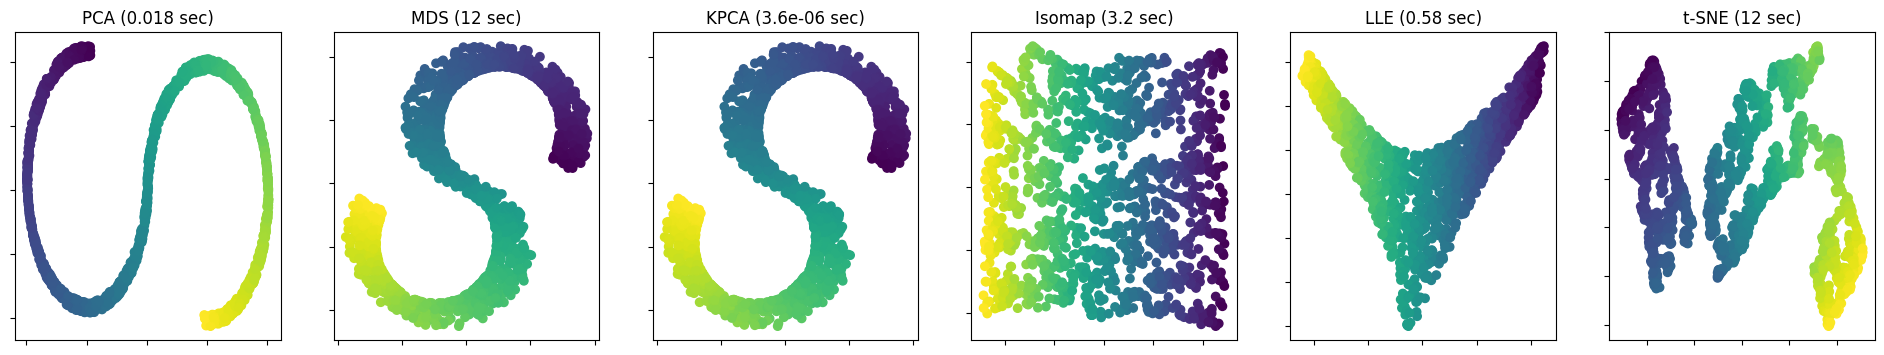

In [10]:
plots = []
fig, axes = plt.subplots(nrows=1, ncols=len(feature_extraction), figsize=(24, 4))

#세션에서 다룬 Unsupervised feature extraction 알고리즘들을 적용해봅시다!
for i, algorithm in enumerate(feature_extraction):
    t0 = time()

    if algorithm == "PCA":
        pca = decomposition.PCA(n_components=2)
        trans_data = pca.fit_transform(S_points).T

    elif algorithm == "MDS":
        mds = manifold.MDS(n_components=2, max_iter=100, n_init=1, random_state=0)
        trans_data = mds.fit_transform(S_points).T

    elif algorithm == "KernelPCA":
        kernel_pca = decomposition.KernelPCA(n_components=2, kernel='rbf')
        trans_data = kernel_pca.fit_transform(S_points).T

    elif algorithm == "Isomap":
        trans_data = manifold.Isomap(n_neighbors=n_neighbors, n_components=2).fit_transform(S_points).T

    elif algorithm == "LLE":
        trans_data = manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2).fit_transform(S_points).T

    elif algorithm == "t-SNE":
        tsne = manifold.TSNE(n_components=2, random_state=0)
        trans_data = tsne.fit_transform(S_points).T

    t1 = time()
    print("%s: %.2g sec" % (algorithm, t1 - t0))

    axes[i].scatter(trans_data[0], trans_data[1], c=S_color)
    axes[i].set_title("%s (%.2g sec)" % (algorithm, t1 - t0))
    axes[i].xaxis.set_major_formatter(ticker.NullFormatter())
    axes[i].yaxis.set_major_formatter(ticker.NullFormatter())
    axes[i].axis("tight")

plt.show()

##result

####Q1-1. Sphere Data Example과 S-curve Data Example에서 각각, 어떠한 feature extraction 방식을 적용한 것이 가장 효과적이라고 생각하며 그 이유는 무엇입니까? (정답이 있는 질문이 아닙니다!)
**절대적으로 모든 상황에 효과적인 차원 축소 방식은 없으며, 데이터의 구조나 분석의 목적에 따라 적합한 방식을 선택하는 것이 필요합니다.

- Sphere data: LLE가 가장 효과적인 것 같다.
- S-curve data: ISOMAP이 가장 효과적인 것 같다.
- 두 feature extraction 방식의 적용 결과는 각각의 data example에서, 같은 특징을 나타내는 데이터의 class별로 잘 묶여있으며, 서로 다른 특징을 나타내는 데이터의 class들은 시각적으로 서로 가장 명확하게 구별하고 있다.
- LLE 기법으로 진행한 2차원 시각화가 가장 뚜렷하게 between-class distance가 최대화, within-class distance가 최소화되어 상대적으로 뚜렷하게 시각화 된 결과를 보인다.
- Isomap 기법의 경우, 데이터의 기하학적 구조 및 거리까지 반영하여 시각화된 결과를 보이기에 가장 효과적이다.

####Q1-2. Sphere Data Example과 S-curve Data Example에서 각각, 가장 성능이 나쁜 알고리즘이 무엇이었다고 생각하며 왜 그러한 결과가 나타났다고 생각하십니까? (정답이 있는 질문이 아닙니다!)

- Sphere data: PCA가 비교적 가장 성능이 나쁜 알고리즘인 것 같다.
- S-curve data: t-SNE가 비교적 가장 성능이 나쁜 알고리즘인 것 같다.
- 저차원에서 제대로 분류가 잘 되지 않는 라벨을 비교해보면, 대부분의 2차원 시각화 결과에서 모여지 있지 않고, 가장 넓게 분포되어 있는 것을 볼 수 있기에 이렇게 추측하였다.
- 아무래도, 고차원에서의 특징과 저차원에서의 특징 비교적 큰 차이를 보이기에, 저차원으로 차원축소되었을 때, 데이터의 정보가 잘 보존되지 않았을 확률이 존재한다.

#2. PCA 수행 결과에 여러 클러스터링 알고리즘을 수행해보기

##1) with iris data set

###데이터 & 라이브러리

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
#iris 데이터 불러오기(라벨을 제거한 데이터)
data = pd.read_csv('/content/drive/MyDrive/DSL/iris_data.csv')

In [13]:
data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [14]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import time

###데이터 전처리

In [15]:
#데이터를 스케일링 해줍니다.
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data)

####Q2-1. 데이터를 스케일링 해주는 이유에 대해서 작성해주세요.

- RobustScaler는 아웃라이어의 영향을 최소화한 기법으로, 중앙값(median)과 IQR(interquartile range)를 사용하는 scaling 기법이다. 데이터를 스케일링 해주는 이유는 데이터의 특성의 범위를 같게 만들어줌으로써, 다차원의 값들을 비교 분석하기 쉽게 만들어주기 위해서이다.  

###PCA 수행

In [16]:
pca = PCA(n_components = 4) #feature의 수만큼 PCA를 수행해 주세요.(hint: 위의 데이터 프레임을 확인해보세요!)
pca_data = pca.fit_transform(scaled_data)

In [17]:
explained_variance = pca.explained_variance_ratio_

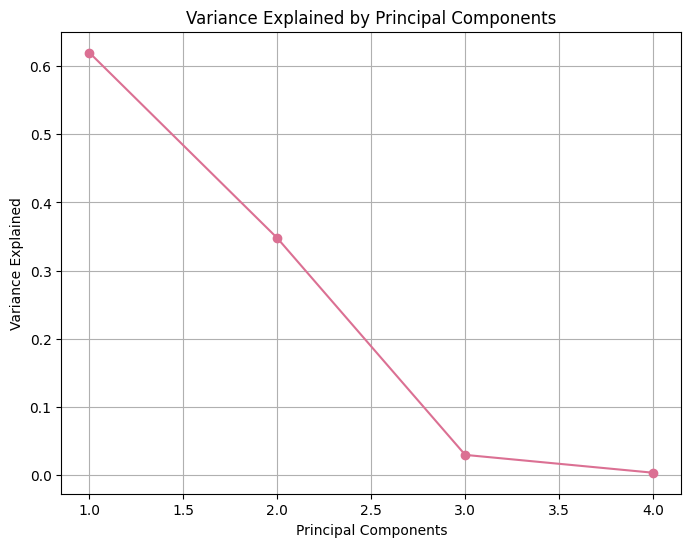

In [18]:
#주성분마다 설명할 수 있는 분산에 대한 그래프를 그립니다.
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='palevioletred')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Principal Components')
plt.grid()
plt.show()

In [19]:
#주성분에 따라 분산의 누적을 계산합니다.
cumulative_variance = np.cumsum(explained_variance)

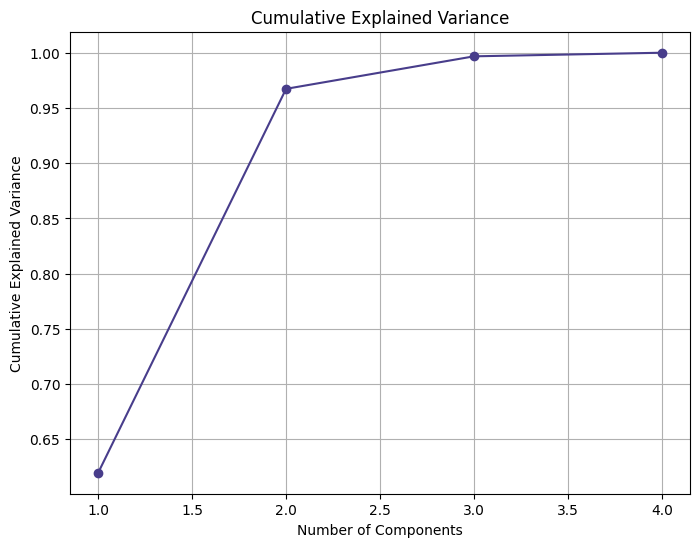

In [21]:
#주성분 수에 따른 누적 분산 그래프를 그립니다.
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='darkslateblue')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid()
plt.show()

####Q2-2. 몇 번째 주성분까지 선택하여 사용할 것인지와 그 이유를 작성해주세요.

- 몇 개의 주성분을 사용할지는, 전체 데이터의 분산 내에서 선택한 p개의 잠재변수가 차지하고 있는 분산의 비율을 이용한다. 이때, 80~90%를 설명하는 주성분을 선택하는데, 3번째와 4번째 주성분은 분산이 작아 데이터에 대한 설명력이 낮은 잠재변수라 판단하여 제거하였기에, 2번째 주성분까지 선택하였다.

In [22]:
n_components = 2 #위에서 답변한 주성분의 개수를 입력해주세요.

In [23]:
#최종적으로 지정해준 수 만큼 PCA 결과, 차원이 축소됩니다.
pca_result = PCA(n_components = n_components)
components_result = pca.fit_transform(scaled_data)

In [24]:
#선택한 주성분이 최종적으로 전체 분산 중 얼마를 설명할 수 있는지 확인할 수 있습니다.
for i in range(1, n_components+1):
  explained=np.sum(pca.explained_variance_ratio_[:i])
  print('The variance explained by the ', i, 'latent variables is {:.2f}%'.format(explained*100))

The variance explained by the  1 latent variables is 61.97%
The variance explained by the  2 latent variables is 96.73%


###(1) k-means Clustering

In [144]:
from sklearn.cluster import KMeans

In [184]:
n_centroids = 2 #직접 중심점 수(=클러스터 수)를 지정해주세요. 여러 번 수행해보면서 클러스터링 결과가 좋을 때까지 변경해보세요!

In [185]:
#k-means Clustering을 수행합니다.
start_time = time.time()

kmeans = KMeans(n_clusters = n_centroids, random_state = 17)
kmeans_clusters = kmeans.fit_predict(components_result)

end_time = time.time()
kmeans_time = end_time - start_time #k-means Clustering이 수행되는 시간을 구합니다.

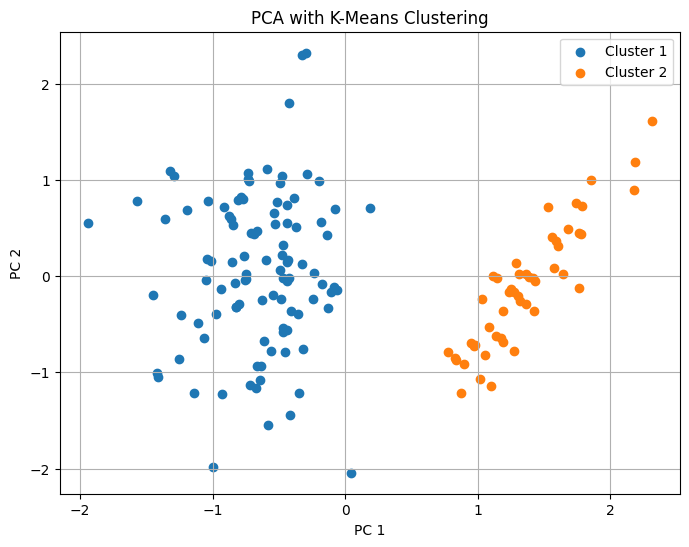

Clustering Time: 0.0865 seconds


In [186]:
#k-means Clustering 결과를 확인합니다.
plt.figure(figsize=(8, 6))
for cluster_num in range(n_centroids):
    plt.scatter(components_result[kmeans_clusters == cluster_num, 0],
                components_result[kmeans_clusters == cluster_num, 1],
                label=f'Cluster {cluster_num + 1}')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA with K-Means Clustering')
plt.legend()
plt.grid()
plt.show()

print(f"Clustering Time: {kmeans_time:.4f} seconds") #k-means Clustering이 수행되는 시간을 출력합니다.

###(2) GMM Clustering

In [53]:
from sklearn.mixture import GaussianMixture

In [87]:
n_gaussians = 3 #직접 가우시안 분포의 수(=클러스터 수)를 지정해주세요. 여러 번 수행해보면서 클러스터링 결과가 좋을 때까지 변경해보세요!

In [88]:
#GMM Clustering을 수행합니다.
start_time = time.time()

gmm = GaussianMixture(n_components=n_gaussians, random_state=17)
gmm_clusters = gmm.fit_predict(components_result)

end_time = time.time()
gmm_time = end_time - start_time #GMM Clustering이 수행되는 시간을 구합니다.

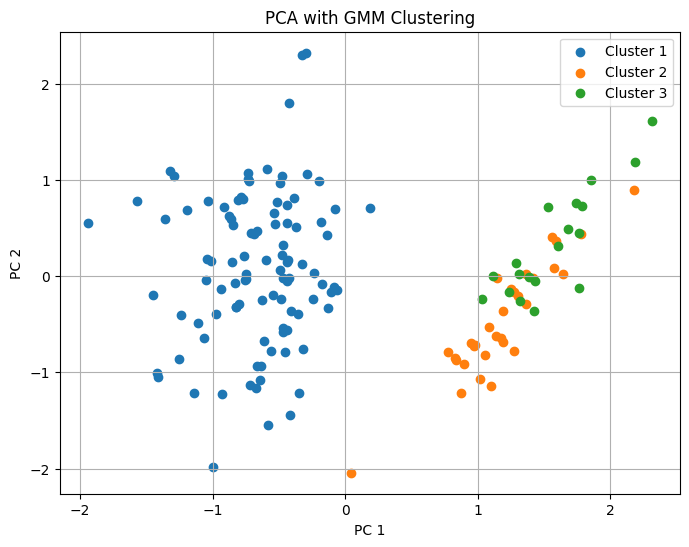

Clustering Time: 0.0927 seconds


In [89]:
#GMM Clustering 결과를 확인합니다.
plt.figure(figsize=(8, 6))
for cluster_num in range(n_gaussians):
    plt.scatter(components_result[gmm_clusters == cluster_num, 0],
                components_result[gmm_clusters == cluster_num, 1],
                label=f'Cluster {cluster_num + 1}')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA with GMM Clustering')
plt.legend()
plt.grid()
plt.show()

print(f"Clustering Time: {gmm_time:.4f} seconds") #GMM Clustering이 수행되는 시간을 출력합니다.

###(3) Hierarchical Clustering

In [174]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

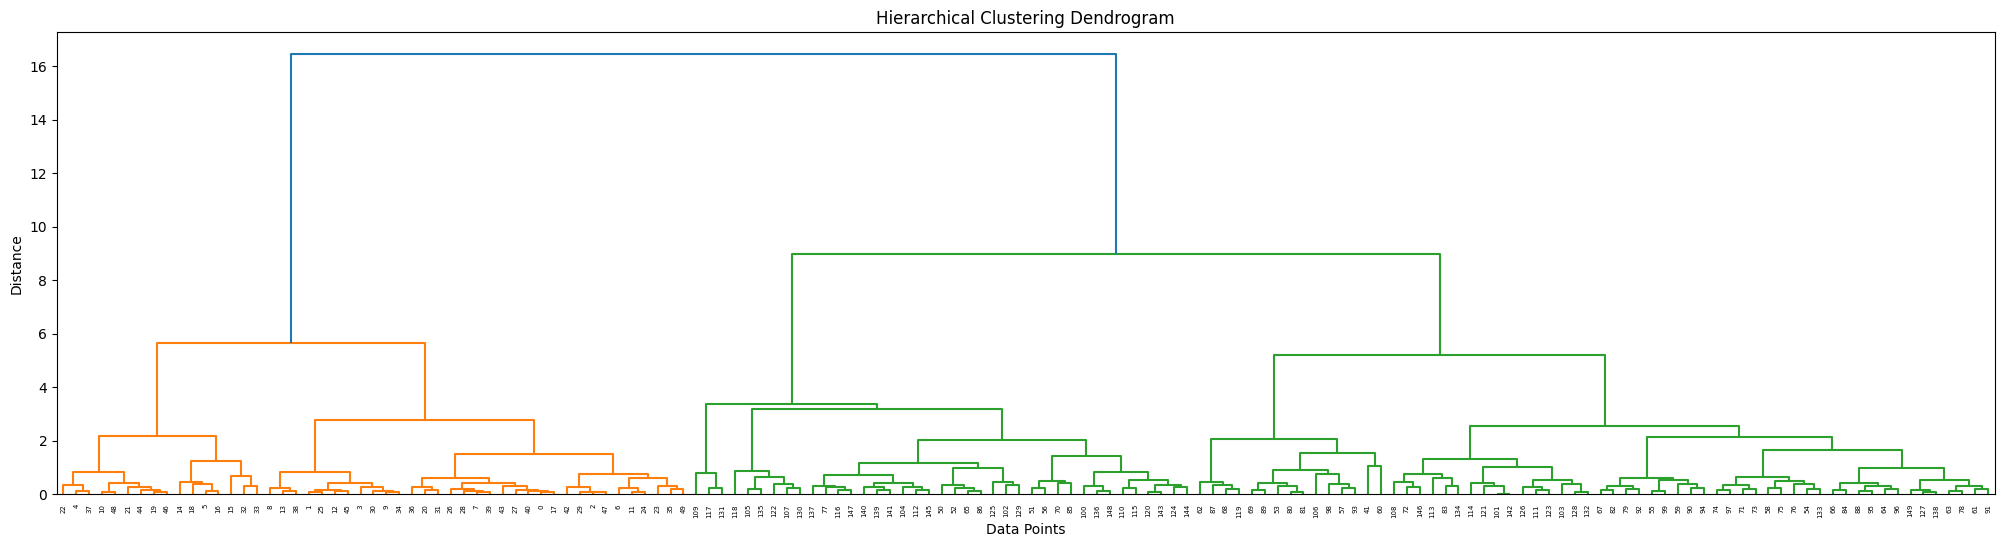

In [176]:
#덴드로그램을 그려봅니다.
start_time = time.time()

linkage_matrix = linkage(components_result, method='ward')
plt.figure(figsize=(25, 6))
dendrogram(linkage_matrix, labels=None)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

end_time = time.time()
dendrogram_time = end_time - start_time

In [177]:
n_clusters = 8 #위의 덴드로그램을 보고 몇 개의 클러스터를 만들 것인지 지정해주세요. 여러 번 수행해보면서 클러스터링 결과가 좋을 때까지 변경해보세요!

In [178]:
#Hierarchical Clustering을 수행합니다.
start_time = time.time()

hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
hierarchical_clusters = hierarchical.fit_predict(components_result)

end_time = time.time()
clustering_time = end_time - start_time #Hierarchical Clustering이 수행되는 시간을 구합니다.

In [179]:
hierarchical_time = dendrogram_time + clustering_time

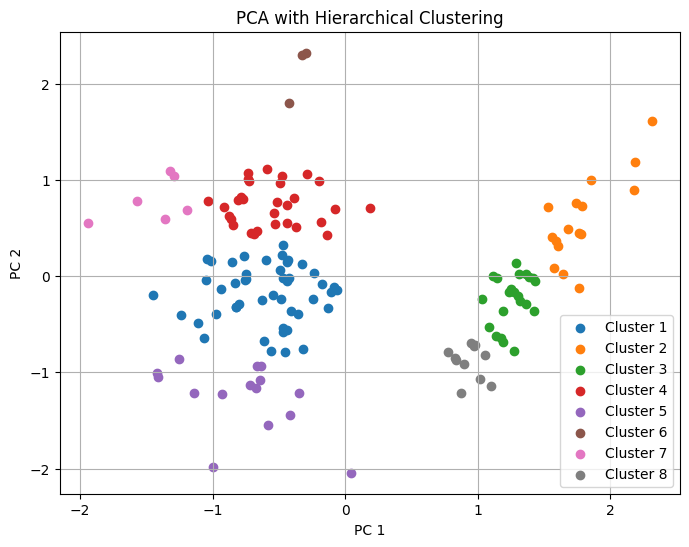

Clustering Time: 2.3550 seconds


In [180]:
#Hierarchical Clustering 결과를 확인합니다.
plt.figure(figsize=(8, 6))
for cluster_num in range(n_clusters):
    plt.scatter(components_result[hierarchical_clusters == cluster_num, 0],
                components_result[hierarchical_clusters == cluster_num, 1],
                label=f'Cluster {cluster_num + 1}')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA with Hierarchical Clustering')
plt.legend()
plt.grid()
plt.show()

print(f"Clustering Time: {hierarchical_time:.4f} seconds") #Hierarchical Clustering이 수행되는 시간을 출력합니다.

###(4) DBSCAN Clustering

In [112]:
from sklearn.cluster import DBSCAN

In [131]:
#DBSCAN을 수행하기 위한 반경과 minPts를 지정해줍니다. 여러 번 수행하면서 결과가 잘 나오게끔 값을 변경해보세요!
eps = 1 #작은 값으로 입력해보다가 조금 큰 값으로 변경해보세요!
minPts = 4

In [132]:
#DBSCAN을 수행합니다.
start_time = time.time()

dbscan = DBSCAN(eps=eps, min_samples=minPts)
dbscan_clusters = dbscan.fit_predict(components_result)

end_time = time.time()
dbscan_time = end_time - start_time #DBSCAN이 수행되는 시간을 구합니다.

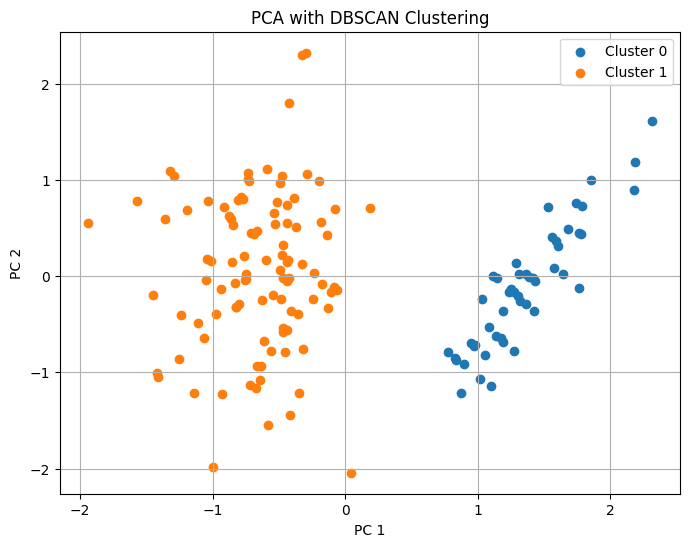

Clustering Time: 0.0165 seconds


In [133]:
#DBSCAN 결과를 확인합니다.
plt.figure(figsize=(8, 6))
unique_clusters = np.unique(dbscan_clusters)
for cluster_num in unique_clusters:
    if cluster_num == -1:
        # Outliers are labeled as -1 in DBSCAN
        plt.scatter(components_result[dbscan_clusters == cluster_num, 0],
                    components_result[dbscan_clusters == cluster_num, 1],
                    label='Outliers', color='gray', alpha=0.3)
    else:
        plt.scatter(components_result[dbscan_clusters == cluster_num, 0],
                    components_result[dbscan_clusters == cluster_num, 1],
                    label=f'Cluster {cluster_num}')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA with DBSCAN Clustering')
plt.legend()
plt.grid()
plt.show()

print(f"Clustering Time: {dbscan_time:.4f} seconds") #DBSCAN이 수행되는 시간을 출력합니다.

###result

In [187]:
import sklearn.metrics as metrics
from sklearn.metrics.cluster import silhouette_score

In [188]:
clustering_result = [kmeans_clusters, gmm_clusters, hierarchical_clusters, dbscan_clusters]
time_result = [kmeans_time, gmm_time, hierarchical_time, dbscan_time]

Clustering_Algorithms = ['k-means Clustering', 'GMM Clustering', 'Hierarchical Clustering', 'DBSCAN']

In [189]:
for clusters, time_taken, algorithms in zip(clustering_result, time_result, Clustering_Algorithms):
    score = metrics.silhouette_score(components_result, clusters)
    print('Silhouette score of {} is {} and it took {:.4f} seconds.'.format(algorithms, score, time_taken))

Silhouette score of k-means Clustering is 0.5284289962068811 and it took 0.0865 seconds.
Silhouette score of GMM Clustering is 0.37082764057381135 and it took 0.0927 seconds.
Silhouette score of Hierarchical Clustering is 0.36208448187593384 and it took 2.3550 seconds.
Silhouette score of DBSCAN is 0.5284289962068811 and it took 0.0165 seconds.


####Q2-3. Silhouette Score와 수행 시간을 각각 비교해주세요.

- 일반적으로 Silhouette Score가 0.5이상이면 클러스터링 결과가 타당하다고 보는데, k-means clustering과 DBSCAN 알고리즘 결과만 0.5이상의 결과를 낸다.
- 수행시간을 비교해보았을 떄, 2초가 넘는 수행시간을 보이는 Hierarchical Clustering을 제외하고는, 다른 모든 알고리즘은 0.1초 이하의 수행시간을 갖는다.

####Q2-4. 최종적으로 가장 클러스터링을 잘 수행한 알고리즘이 무엇인지 작성하고, 그렇게 생각한 이유를 적어주세요.

- 실루엣 계수는 각 군집 간의 거리가 얼마나 효율적을 분리되어 있는지를 나타내는 지표로, 크기가 클수록 클러스터링 알고리즘의 성능이 높다고 분석할 수 있다. 실루엣 계수를 기반으로, DBSCAN = K-means Clustering > GMM Clustering > Hierarchical Clustering 순으로 알고리즘의 성능이 높다고 할 수 있다.
- 이를 시각화의 결과로 보았을 때, DBSCAN과 k-means clustering 알고리즘 시각화 결과가 클러스터 구분이 잘 되어 군집 간 상대적인 거리를 잘 유지하고 있으며, 같은 군집 내의 모든 개체들 사이의 평균 거리는 짧고, 다른 군집 내에 있는 모든 개체들 간의 평균 거리는 비교적 크기에, 군집화가 비교적 잘되어 있다고 결과를 해석할 수 있다.
- DBSCAN과 k-means clustering 알고리즘을 비교해볼때, 수행 시간은 DBSCAN이 조금 더 빠르기에, 이를 모두 종합해볼 때, DBSCAN 알고리즘 결과가 우리가 원하는 정답 모양과 가장 가깝다고 할 수 있다.

##2) with wine data set

###데이터 & 라이브러리

In [190]:
#wine 데이터 불러오기(라벨을 제거한 데이터)
data = pd.read_csv('/content/drive/MyDrive/DSL/wine_data.csv')

In [191]:
data.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


In [192]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
import time

###데이터 전처리

In [193]:
#데이터를 스케일링 해줍니다.
scaler = RobustScaler()
scaled_data = scaler.fit_transform(data)

###PCA 수행

In [194]:
pca = PCA(n_components = 13) #feature의 수만큼 PCA를 수행해 주세요.(hint: 위의 데이터 프레임을 확인해보세요!)
pca_data = pca.fit_transform(scaled_data)

In [195]:
explained_variance = pca.explained_variance_ratio_

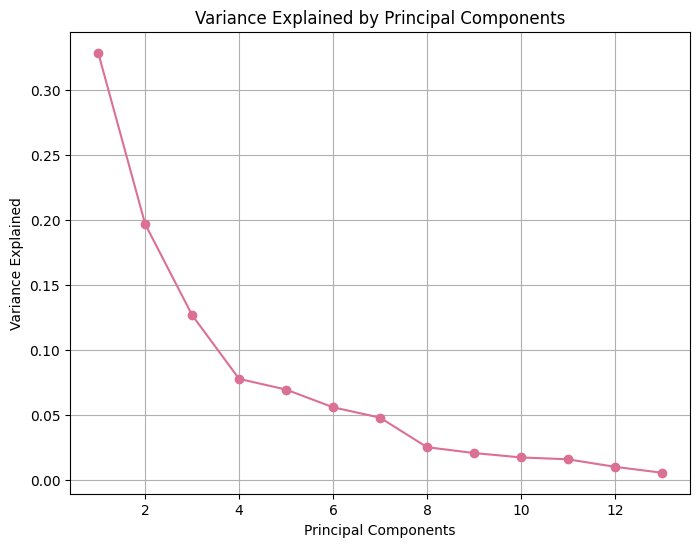

In [198]:
#주성분마다 설명할 수 있는 분산에 대한 그래프를 그립니다.
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='palevioletred')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Principal Components')
plt.grid()
plt.show()

In [197]:
#주성분에 따라 분산의 누적을 계산합니다.
cumulative_variance = np.cumsum(explained_variance)

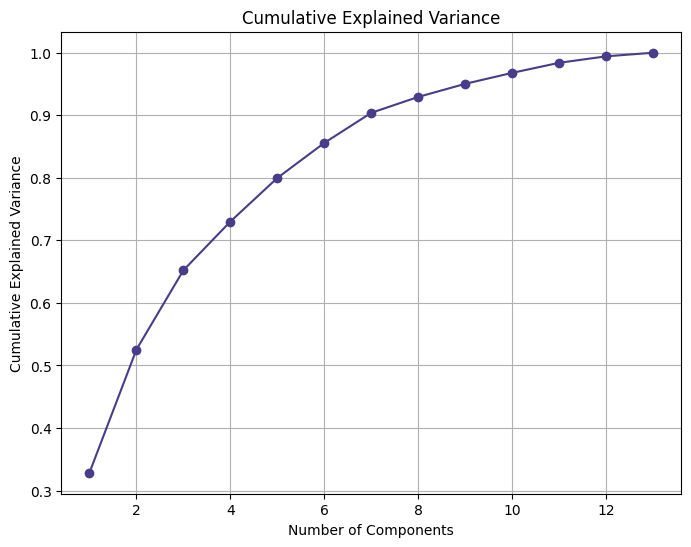

In [199]:
#주성분 수에 따른 누적 분산 그래프를 그립니다.
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='darkslateblue')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid()
plt.show()

####Q2-5. 몇 번째 주성분까지 선택하여 사용할 것인지와 그 이유를 작성해주세요.

- 몇 개의 주성분을 사용할지는, 전체 데이터의 분산 내에서 선택한 p개의 잠재변수가 차지하고 있는 분산의 비율을 이용한다. 이때, 80~90%를 설명하는 주성분을 선택하는데, 7번째 이상의 주성분은 분산이 작아 데이터에 대한 설명력이 낮은 잠재변수라 판단하여 제거하였기에, 6번째 주성분까지 선택하였다.

In [206]:
n_components = 6 #위에서 답변한 주성분의 개수를 입력해주세요.

In [207]:
#최종적으로 지정해준 수 만큼 PCA 결과, 차원이 축소됩니다.
pca_result = PCA(n_components = n_components)
components_result = pca.fit_transform(scaled_data)

In [208]:
#선택한 주성분이 최종적으로 전체 분산 중 얼마를 설명할 수 있는지 확인할 수 있습니다.
for i in range(1, n_components+1):
  explained=np.sum(pca.explained_variance_ratio_[:i])
  print('The variance explained by the ', i, 'latent variables is {:.2f}%'.format(explained*100))

The variance explained by the  1 latent variables is 32.85%
The variance explained by the  2 latent variables is 52.53%
The variance explained by the  3 latent variables is 65.22%
The variance explained by the  4 latent variables is 73.01%
The variance explained by the  5 latent variables is 79.98%
The variance explained by the  6 latent variables is 85.58%


###Clustering

In [209]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

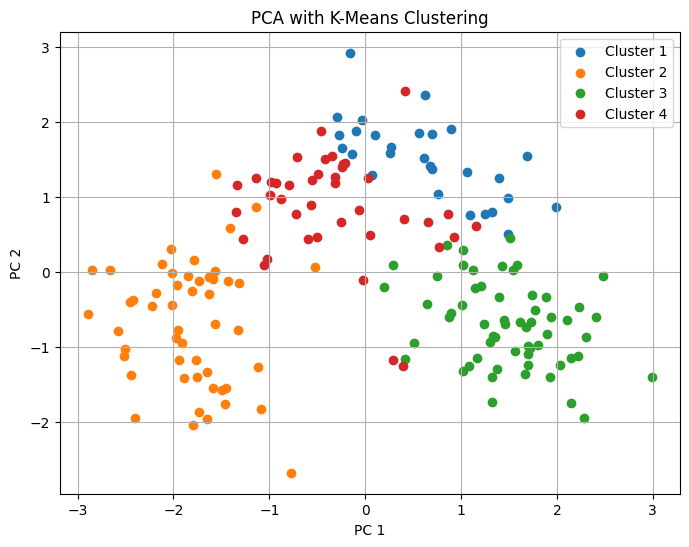

Clustering Time: 0.1965 seconds


In [213]:
#k-means Clustering을 수행합니다.
start_time = time.time()

n_centroids = 4 #직접 지정해주세요.

kmeans = KMeans(n_clusters = n_centroids, random_state = 17)
kmeans_clusters = kmeans.fit_predict(components_result)

end_time = time.time()
kmeans_time = end_time - start_time #k-means Clustering이 수행되는 시간을 구합니다.

#k-means Clustering 결과를 확인합니다.
plt.figure(figsize=(8, 6))
for cluster_num in range(n_centroids):
    plt.scatter(components_result[kmeans_clusters == cluster_num, 0],
                components_result[kmeans_clusters == cluster_num, 1],
                label=f'Cluster {cluster_num + 1}')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA with K-Means Clustering')
plt.legend()
plt.grid()
plt.show()

print(f"Clustering Time: {kmeans_time:.4f} seconds") #k-means Clustering이 수행되는 시간을 출력합니다.

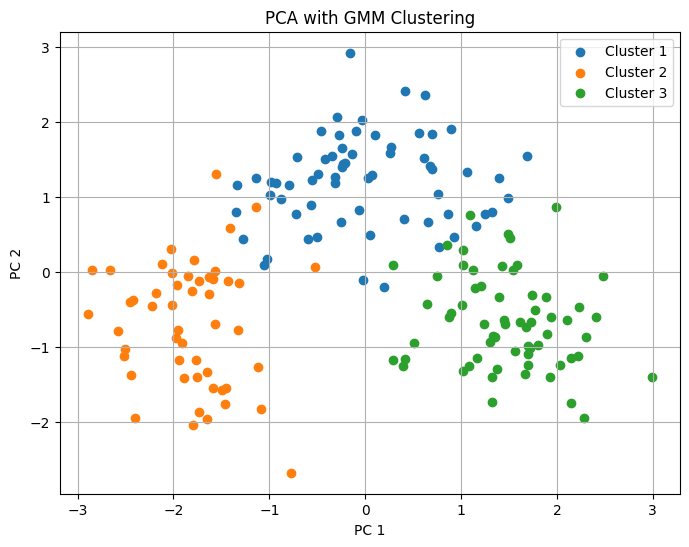

Clustering Time: 0.0570 seconds


In [212]:
#GMM Clustering을 수행합니다.
start_time = time.time()

n_gaussians = 3 #직접 지정해주세요.

gmm = GaussianMixture(n_components = n_gaussians, random_state=17)
gmm_clusters = gmm.fit_predict(components_result)

end_time = time.time()
gmm_time = end_time - start_time #GMM Clustering이 수행되는 시간을 구합니다.

#GMM Clustering 결과를 확인합니다.
plt.figure(figsize=(8, 6))
for cluster_num in range(n_gaussians):
    plt.scatter(components_result[gmm_clusters == cluster_num, 0],
                components_result[gmm_clusters == cluster_num, 1],
                label=f'Cluster {cluster_num + 1}')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA with GMM Clustering')
plt.legend()
plt.grid()
plt.show()

print(f"Clustering Time: {gmm_time:.4f} seconds") #GMM Clustering이 수행되는 시간을 출력합니다.

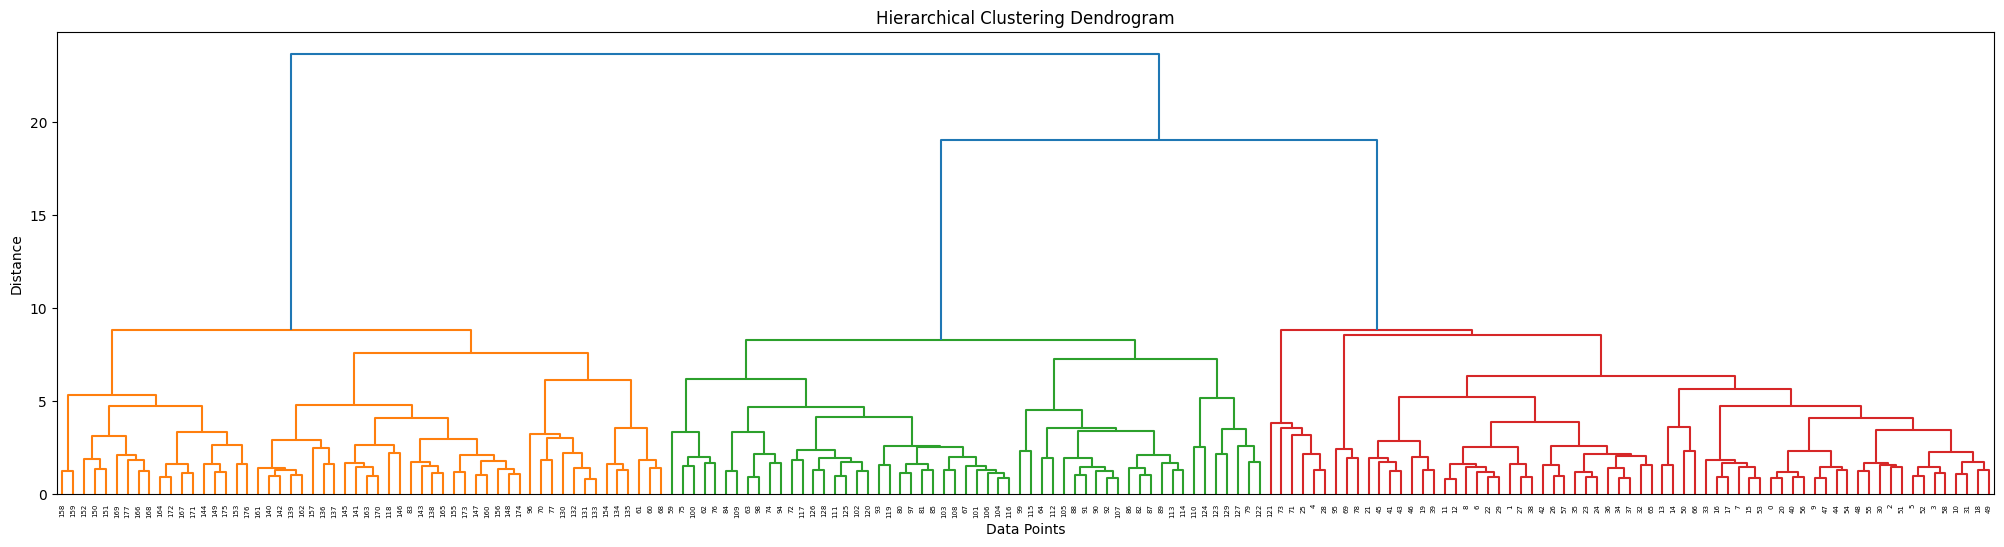

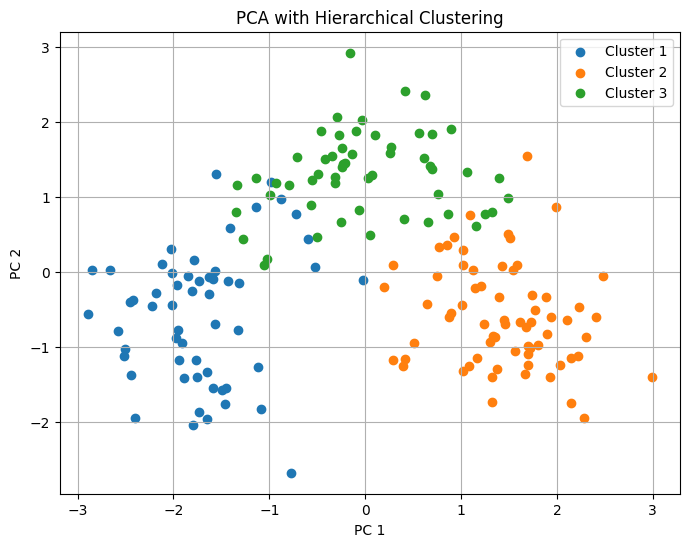

Clustering Time: 3.8588 seconds


In [217]:
#Hierarchical Clustering을 수행합니다.
start_time = time.time()

#덴드로그램을 그려봅니다.
linkage_matrix = linkage(components_result, method='ward')
plt.figure(figsize=(25, 6))
dendrogram(linkage_matrix, labels=None)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

n_clusters = 3 #직접 지정해주세요.

hierarchical = AgglomerativeClustering(n_clusters = n_clusters)
hierarchical_clusters = hierarchical.fit_predict(components_result)

end_time = time.time()
hierarchical_time = end_time - start_time #Hierarchical Clustering이 수행되는 시간을 구합니다.

#Hierarchical Clustering 결과를 확인합니다.
plt.figure(figsize=(8, 6))
for cluster_num in range(n_clusters):
    plt.scatter(components_result[hierarchical_clusters == cluster_num, 0],
                components_result[hierarchical_clusters == cluster_num, 1],
                label=f'Cluster {cluster_num + 1}')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA with Hierarchical Clustering')
plt.legend()
plt.grid()
plt.show()

print(f"Clustering Time: {hierarchical_time:.4f} seconds") #Hierarchical Clustering이 수행되는 시간을 출력합니다.

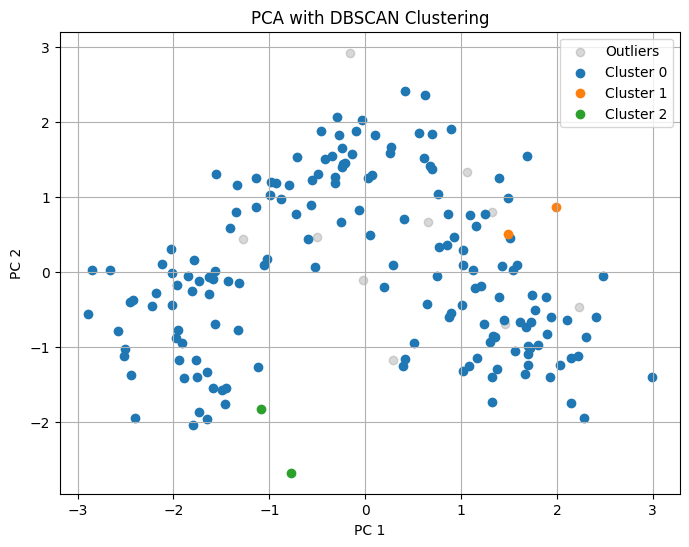

Clustering Time: 0.0120 seconds


In [256]:
#DBSCAN을 수행합니다.
start_time = time.time()

dbscan = DBSCAN(eps = 2, min_samples = 2) #DBSCAN을 수행하기 위한 반경과 minPts를 지정해줍니다. 여러 번 수행하면서 결과가 잘 나오게끔 값을 변경해보세요!
dbscan_clusters = dbscan.fit_predict(components_result)

end_time = time.time()
dbscan_time = end_time - start_time #DBSCAN이 수행되는 시간을 구합니다.

#DBSCAN 결과를 확인합니다.
plt.figure(figsize=(8, 6))
unique_clusters = np.unique(dbscan_clusters)
for cluster_num in unique_clusters:
    if cluster_num == -1:
        # Outliers are labeled as -1 in DBSCAN
        plt.scatter(components_result[dbscan_clusters == cluster_num, 0],
                    components_result[dbscan_clusters == cluster_num, 1],
                    label='Outliers', color='gray', alpha=0.3)
    else:
        plt.scatter(components_result[dbscan_clusters == cluster_num, 0],
                    components_result[dbscan_clusters == cluster_num, 1],
                    label=f'Cluster {cluster_num}')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA with DBSCAN Clustering')
plt.legend()
plt.grid()
plt.show()

print(f"Clustering Time: {dbscan_time:.4f} seconds") #DBSCAN이 수행되는 시간을 출력합니다.

####DBSCAN bonus

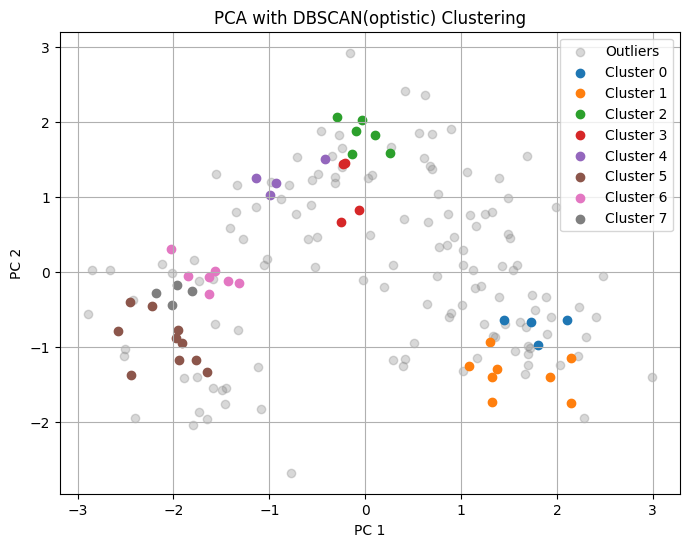

Clustering Time: 0.1335 seconds


In [257]:
#위에서 수행해보셨다면, 직접 변수를 지정하기 힘드셨을 겁니다. sklearn에서는 최적화된 eps를 구할 수 있는 패키지를 제공합니다!
from sklearn.cluster import OPTICS

start_time = time.time()

optics = OPTICS(min_samples=4) #추가로, 2차원에서 클러스터링을 할 때 DBSCAN은 minPts = 4로 지정하다는 것이 가장 좋다는 논문 내용이 있습니다!
clusters = optics.fit_predict(components_result)

end_time = time.time()
clustering_time = end_time - start_time

plt.figure(figsize=(8, 6))
unique_clusters = np.unique(clusters)
for cluster_num in unique_clusters:
    if cluster_num == -1:
        # Outliers are labeled as -1 in OPTICS
        plt.scatter(components_result[clusters == cluster_num, 0],
                    components_result[clusters == cluster_num, 1],
                    label='Outliers', color='gray', alpha=0.3)
    else:
        plt.scatter(components_result[clusters == cluster_num, 0],
                    components_result[clusters == cluster_num, 1],
                    label=f'Cluster {cluster_num}')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA with DBSCAN(optistic) Clustering')
plt.legend()
plt.grid()
plt.show()

print(f"Clustering Time: {clustering_time:.4f} seconds")

###result

In [258]:
import sklearn.metrics as metrics
from sklearn.metrics.cluster import silhouette_score

In [259]:
clustering_result = [kmeans_clusters, gmm_clusters, hierarchical_clusters, dbscan_clusters]
time_result = [kmeans_time, gmm_time, hierarchical_time, dbscan_time]

Clustering_Algorithms = ['k-means Clustering', 'GMM Clustering', 'Hierarchical Clustering', 'DBSCAN']

In [260]:
for clusters, time_taken, algorithms in zip(clustering_result, time_result, Clustering_Algorithms):
    score = metrics.silhouette_score(components_result, clusters)
    print('Silhouette score of {} is {} and it took {:.4f} seconds.'.format(algorithms, score, time_taken))

Silhouette score of k-means Clustering is 0.2360852799240017 and it took 0.1965 seconds.
Silhouette score of GMM Clustering is 0.2627285748291147 and it took 0.0570 seconds.
Silhouette score of Hierarchical Clustering is 0.25629277931916994 and it took 3.8588 seconds.
Silhouette score of DBSCAN is 0.13462132061102375 and it took 0.0120 seconds.


####Q2-5. Silhouette Score와 수행 시간을 각각 비교해주세요.

- 일반적으로 Silhouette Score가 0.5이상이면 클러스터링 결과가 타당하다고 보는데, 반복적으로 수행해본 결과, 4개의 알고리즘의 silhouette score이 0.5이상 나오는 변수를 찾지 못하였다.
- 수행시간을 비교해보았을 떄, 3초가 넘는 수행시간을 보이는 Hierarchical Clustering을 제외하고는, 다른 모든 알고리즘은 약 0.1초의 수행시간을 갖는다.

####Q2-6. iris data set에 비하여, wine data set에서 결과가 나쁘게 나온 이유가 무엇일지 작성해주세요.

- 아무래도 iris data set과 비교하였을 때, wine data set의 feature 수가 훨씬 많아 데이터가 고차원이어서, 공통 cluster로 분류하는 것이 더 복잡하기에 결과가 좋게 나오기 어렵지 않았나 싶다!!

#3. Non-Linear Feature Extraction + k-means Clustering 성능 비교

클러스터링이 잘 이루어지지 않은 wine data에 대해서 다른 차원축소 알고리즘을 적용한 뒤, k-means Clustering을 수행해봅시다!

##데이터 & 라이브러리

In [261]:
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
!pip install umap-learn -q
import umap

from sklearn.cluster import KMeans

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [262]:
#wine 데이터 불러오기(라벨을 제거한 데이터)
data = pd.read_csv('/content/drive/MyDrive/DSL/wine_data.csv')

##데이터 전처리

In [282]:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(scaled_data)

In [283]:
n_clusters = 4 #직접 클러스터의 수를 지정해주세요.

##1) KPCA + k-means Clustering

In [284]:
kernel_pca = KernelPCA(n_components=2, kernel='rbf')
kpca_result = kernel_pca.fit_transform(scaled_data)

In [285]:
kmeans = KMeans(n_clusters = n_clusters, random_state = 17)
kmeans.fit(kpca_result)
kpca_labels = kmeans.labels_

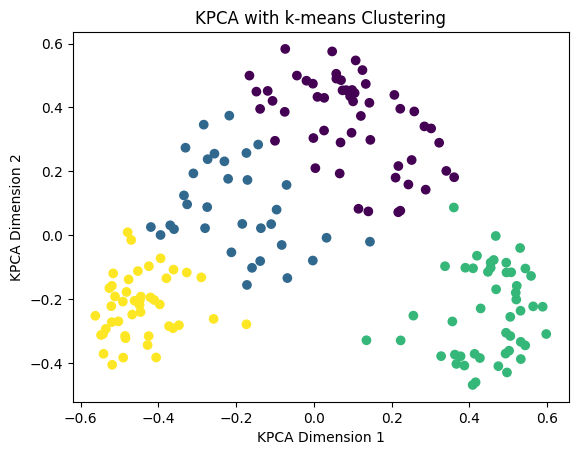

In [286]:
plt.scatter(kpca_result[:, 0], kpca_result[:, 1], c=kpca_labels, cmap='viridis')
plt.xlabel('KPCA Dimension 1')
plt.ylabel('KPCA Dimension 2')
plt.title('KPCA with k-means Clustering')
plt.show()

##2) t-SNE + k-means Clustering

In [287]:
tsne = TSNE(n_components = 2, random_state = 17)
tsne_result = tsne.fit_transform(scaled_data)

In [288]:
kmeans = KMeans(n_clusters = n_clusters, random_state = 17)
kmeans.fit(tsne_result)
tsne_labels = kmeans.labels_

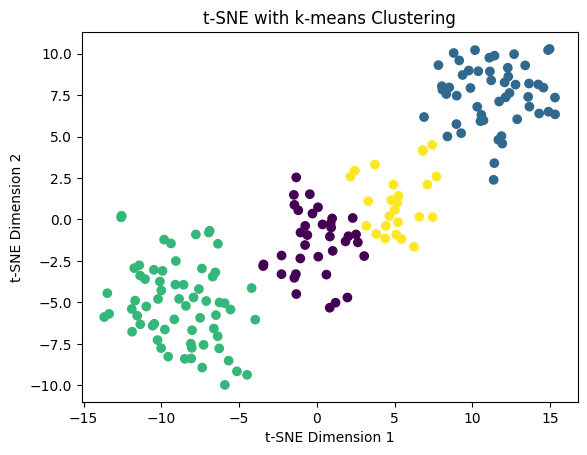

In [289]:
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=tsne_labels, cmap='viridis')
plt.title('t-SNE with k-means Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

##3) UMAP + k-means Clustering

In [290]:
reducer = umap.UMAP()
umap_result = reducer.fit_transform(scaled_data)

In [291]:
kmeans = KMeans(n_clusters = n_clusters, random_state = 17)
kmeans.fit(umap_result)
umap_labels = kmeans.labels_

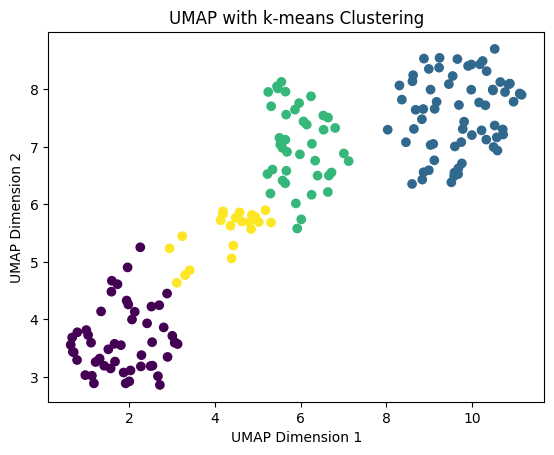

In [292]:
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=umap_labels, cmap='viridis')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP with k-means Clustering')
plt.show()

##조합 별 성능 측정(Silhouette Score)

In [293]:
#KPCA 결과
silhouette_result = silhouette_score(kpca_result, kpca_labels)
print('Silhouette score is {}.'.format(silhouette_result))

Silhouette score is 0.528153134695129.


In [294]:
#t-SNE 결과
silhouette_result = silhouette_score(tsne_result, tsne_labels)
print('Silhouette score is {}.'.format(silhouette_result))

Silhouette score is 0.5215499401092529.


In [295]:
#UMAP 결과
silhouette_result = silhouette_score(umap_result, umap_labels)
print('Silhouette score is {}.'.format(silhouette_result))

Silhouette score is 0.5838484764099121.


##result

####Q3-1. 어떤 조합의 알고리즘에서 Silhouette Score가 가장 높게 나타났나요? (부등호로 크기를 비교해주세요.)

- UMAP > KPCA > t-SNE

####Q3-2. wine data set을 PCA로 차원축소 했을 때보다 KPCA, t-SNE, UMAP을 통해 차원축소하여 클러스터링 한 결과가 더 좋았다면, 그 이유가 무엇인지 작성해주세요.

- wine data set을 PCA로 차원축소 했을 때보다 KPCA, t-SNE, UMAP을 통해 차원축소하여 클러스터링 한 결과가 더 좋았다. 그 이유는, KPCA, t-SNE, UMAP 알고리즘은 특히 고차원에서 효과적인 차원축소를 할 수 있는 방식인 것이다.
- KPCA 특성상 Kernal 함수를 이용하여 고차원에서 PCA를 진행하고, t-SNE는 고차원과 저차원에서의 차이를 최소화하는 방식으로 차원 축소를 진행하며, UMAP은 마찬가지로 kernal 함수를 이용하여 고차원에서 LDA를 진행하는 알고리즘이다.

####Q3-3. 최종적으로 wine data set에 대해 가장 성능이 좋았던 알고리즘이 무엇이며, 그 차원축소 방식의 특징을 두 가지 이상 작성해주세요.

- 최종적으로 wine data set에 대해 가장 성능이 좋았던 알고리즘은 UMAP를 통해 차원 축소한 후, k-means clustering를 진행한 방식이다. wine data set이 워낙 feature의 개수가 많은 고차원의 데이터였기에, clustering을 진행하기 전에 차원축소가 필요했던 것이다.
- UMAP의 두 가지 특징을 작성해보자면...
- 고차원 상태에서 데이터 포인트마다 주변에 있는 다른 포인트와의 연결되는 정도를 likelihood로 표현하는 그래프를 생성하며,
- 저차원 공간에서는 데이터 포인트 사이의 최소 거리를 변수로 지정함으로써, 고차원 그래프와 저차원 그래프가 최대한 비슷할 수 있게 최적화하는 차원 축소 알고리즘이다.
- 7월 25일 Unsupervised Learning 세션 자료를 참고하였습니다!!